In [89]:
import numpy as np
import torch
import torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [90]:
# Load MNIST
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True
)

val_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


In [91]:
def one_hot(labels, num_classes=10):
    return np.eye(num_classes)[labels]


In [92]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2


In [93]:
def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True)  # numerical stability
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [94]:
def cross_entropy_loss(y_pred, y_true):
    eps = 1e-8
    return -np.mean(np.sum(y_true * np.log(y_pred + eps), axis=1))


In [95]:
class NeuralNetwork:
    def __init__(self, layer_sizes, activation="relu", lr=0.01):
        self.layer_sizes = layer_sizes
        self.lr = lr
        self.activation_name = activation

        self.weights = []
        self.biases = []
        self.z = []
        self.a = []

        for i in range(len(layer_sizes)-1):
            self.weights.append(
                np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.01
            )
            self.biases.append(np.zeros((1, layer_sizes[i+1])))

    def forward(self, X):
        self.a = [X]
        self.z = []

        for i in range(len(self.weights)-1):
            z = self.a[-1] @ self.weights[i] + self.biases[i]
            self.z.append(z)
            self.a.append(self.activation(z))

        # Output layer
        z = self.a[-1] @ self.weights[-1] + self.biases[-1]
        self.z.append(z)
        self.a.append(softmax(z))

        return self.a[-1]

    def activation(self, z):
      if self.activation_name == "relu":
          return relu(z)
      elif self.activation_name == "sigmoid":
          return sigmoid(z)
      elif self.activation_name == "tanh":
          return tanh(z)

    def activation_derivative(self, z):
      if self.activation_name == "relu":
          return relu_derivative(z)
      elif self.activation_name == "sigmoid":
          return sigmoid_derivative(z)
      elif self.activation_name == "tanh":
          return tanh_derivative(z)

    def backward(self, y_true):
        m = y_true.shape[0]
        grads_w = []
        grads_b = []

        delta = self.a[-1] - y_true  # softmax + CE

        for i in reversed(range(len(self.weights))):
            dw = self.a[i].T @ delta / m
            db = np.mean(delta, axis=0, keepdims=True)

            grads_w.insert(0, dw)
            grads_b.insert(0, db)

            if i != 0:
                delta = (delta @ self.weights[i].T) * self.activation_derivative(self.z[i-1])

        self.grads_w = grads_w
        self.grads_b = grads_b

    def update_parameters(self):
        for i in range(len(self.weights)):
            self.weights[i] -= self.lr * self.grads_w[i]
            self.biases[i] -= self.lr * self.grads_b[i]

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)

    def evaluate(self, loader):
        correct, total = 0, 0
        losses = []

        for images, labels in loader:
            images = images.cpu().numpy().reshape(images.shape[0], -1)
            labels = labels.cpu().numpy()
            y_true = one_hot(labels)

            y_pred = self.forward(images)
            loss = cross_entropy_loss(y_pred, y_true)
            losses.append(loss)

            preds = np.argmax(y_pred, axis=1)
            correct += np.sum(preds == labels)
            total += labels.shape[0]

        return np.mean(losses), correct / total

    def train(model, epochs):
      train_losses, val_losses = [], []
      train_accs, val_accs = [], []

      for epoch in range(epochs):
          for images, labels in train_loader:
              images = images.cpu().numpy().reshape(images.shape[0], -1) / 1.0
              labels = labels.cpu().numpy()
              y_true = one_hot(labels)

              model.forward(images)
              model.backward(y_true)
              model.update_parameters()

          train_loss, train_acc = model.evaluate(train_loader)
          val_loss, val_acc = model.evaluate(val_loader)

          train_losses.append(train_loss)
          val_losses.append(val_loss)
          train_accs.append(train_acc)
          val_accs.append(val_acc)

          print(f"Epoch {epoch+1}: "
                f"Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")

      return train_losses, val_losses, train_accs, val_accs






In [96]:
def activation(self, z):
    if self.activation_name == "relu":
        return relu(z)
    elif self.activation_name == "sigmoid":
        return sigmoid(z)
    elif self.activation_name == "tanh":
        return tanh(z)

def activation_derivative(self, z):
    if self.activation_name == "relu":
        return relu_derivative(z)
    elif self.activation_name == "sigmoid":
        return sigmoid_derivative(z)
    elif self.activation_name == "tanh":
        return tanh_derivative(z)


In [97]:
def forward(self, X):
    self.a = [X]
    self.z = []

    for i in range(len(self.weights)-1):
        z = self.a[-1] @ self.weights[i] + self.biases[i]
        self.z.append(z)
        self.a.append(self.activation(z))

    # Output layer
    z = self.a[-1] @ self.weights[-1] + self.biases[-1]
    self.z.append(z)
    self.a.append(softmax(z))

    return self.a[-1]


In [98]:
def backward(self, y_true):
    m = y_true.shape[0]
    grads_w = []
    grads_b = []

    delta = self.a[-1] - y_true  # softmax + CE

    for i in reversed(range(len(self.weights))):
        dw = self.a[i].T @ delta / m
        db = np.mean(delta, axis=0, keepdims=True)

        grads_w.insert(0, dw)
        grads_b.insert(0, db)

        if i != 0:
            delta = (delta @ self.weights[i].T) * self.activation_derivative(self.z[i-1])

    self.grads_w = grads_w
    self.grads_b = grads_b


In [99]:
def update_parameters(self):
    for i in range(len(self.weights)):
        self.weights[i] -= self.lr * self.grads_w[i]
        self.biases[i] -= self.lr * self.grads_b[i]


In [100]:
def predict(self, X):
      probs = self.forward(X)
      return np.argmax(probs, axis=1)

def evaluate(self, loader):
    correct, total = 0, 0
    losses = []

    for images, labels in loader:
        images = images.cpu().numpy().reshape(images.shape[0], -1)
        labels = labels.cpu().numpy()
        y_true = one_hot(labels)
        y_pred = self.forward(images)
        loss = cross_entropy_loss(y_pred, y_true)
        losses.append(loss)

        preds = np.argmax(y_pred, axis=1)
        correct += np.sum(preds == labels)
        total += labels.shape[0]

        return np.mean(losses), correct / total


In [101]:
def train(model, epochs):
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    for epoch in range(epochs):
        for images, labels in train_loader:
            images = images.cpu().numpy().reshape(images.shape[0], -1) / 1.0
            labels = labels.cpu().numpy()
            y_true = one_hot(labels)

            model.forward(images)
            model.backward(y_true)
            model.update_parameters()

        train_loss, train_acc = model.evaluate(train_loader)
        val_loss, val_acc = model.evaluate(val_loader)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        print(f"Epoch {epoch+1}: "
              f"Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")

    return train_losses, val_losses, train_accs, val_accs


In [102]:
model = NeuralNetwork(
    layer_sizes=[784, 128, 64, 10],
    activation="relu",
    lr=0.01
)

train_losses, val_losses, train_accs, val_accs = train(model, epochs=10)


Epoch 1: Train Acc=0.1124, Val Acc=0.1135
Epoch 2: Train Acc=0.1124, Val Acc=0.1135
Epoch 3: Train Acc=0.2098, Val Acc=0.2104
Epoch 4: Train Acc=0.5234, Val Acc=0.5266
Epoch 5: Train Acc=0.7139, Val Acc=0.7145
Epoch 6: Train Acc=0.7912, Val Acc=0.8005
Epoch 7: Train Acc=0.8244, Val Acc=0.8286
Epoch 8: Train Acc=0.8549, Val Acc=0.8563
Epoch 9: Train Acc=0.8759, Val Acc=0.8779
Epoch 10: Train Acc=0.8907, Val Acc=0.8912


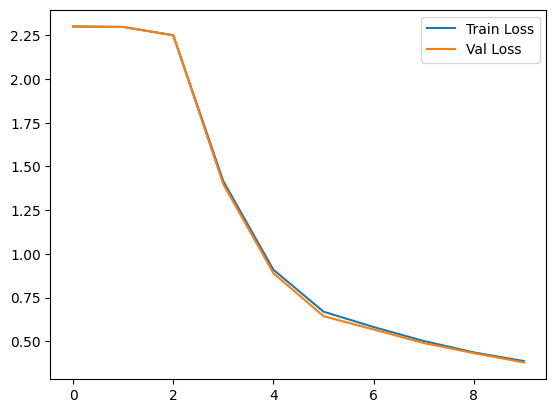

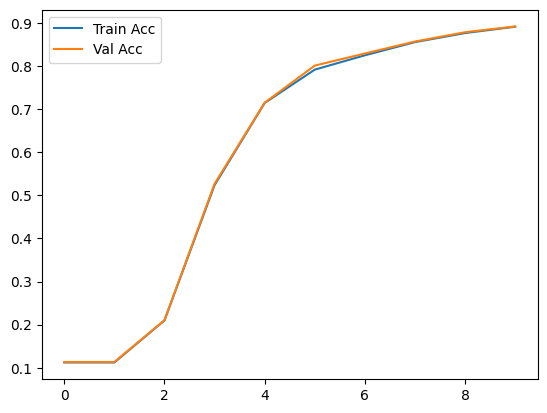

In [103]:
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.legend()
plt.savefig("loss_curve.png")
plt.show()

plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.legend()
plt.savefig("accuracy_curve.png")
plt.show()
